## Customer Churn Analysis

# Data collection

In [1]:
#importing the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data and printing the first 10 rows of the data
df=pd.read_csv('chunkdata.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#displaying the bottom 10 rows of the dataset
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In this data we can see that the Dependent variable "Churn" is Categorical Nominal type,

So we can say its a classification(Logistic regression) problem.

## EXPLORATORY DATA ANALYSIS

In [4]:
#displaying the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can see that ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport''StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges'] are Independent Variable. And ['Churn'] is Dependent variable. 

In [5]:
#displaying the number of columns and number of rows
df.shape

(7043, 21)

We have 21 variables with 7043 records

In [6]:
#checking the data type of all varialbe
data_type=df.dtypes
data_type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#counting the number of data type present
data_type.value_counts()

object     18
int64       2
float64     1
dtype: int64

We can see that there are 18 variable with object type and 2 variable with integer type and 1 variable with float type.

In [8]:
#displaying the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#checking wheather null value is present or not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#displaying the maximum and minimum and the total unique element in categorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f"----- column: {i} -----")
    print('Max : ' ,df[i].max())
    print('Min : ' ,df[i].min())
    print('Number of unique element : ',df[i].nunique())
    if df[i].nunique() <= 10:
      print('Unique elements are :', df[i].unique())
    print('\n\n\n')

----- column: customerID -----
Max :  9995-HOTOH
Min :  0002-ORFBO
Number of unique element :  7043




----- column: gender -----
Max :  Male
Min :  Female
Number of unique element :  2
Unique elements are : ['Female' 'Male']




----- column: Partner -----
Max :  Yes
Min :  No
Number of unique element :  2
Unique elements are : ['Yes' 'No']




----- column: Dependents -----
Max :  Yes
Min :  No
Number of unique element :  2
Unique elements are : ['No' 'Yes']




----- column: PhoneService -----
Max :  Yes
Min :  No
Number of unique element :  2
Unique elements are : ['No' 'Yes']




----- column: MultipleLines -----
Max :  Yes
Min :  No
Number of unique element :  3
Unique elements are : ['No phone service' 'No' 'Yes']




----- column: InternetService -----
Max :  No
Min :  DSL
Number of unique element :  3
Unique elements are : ['DSL' 'Fiber optic' 'No']




----- column: OnlineSecurity -----
Max :  Yes
Min :  No
Number of unique element :  3
Unique elements are : ['No' 'Yes' 'No 

we can see that there is there are most of the column with  yes or no in our data frame.

In [11]:
#checking the count of unique value in categorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f'===== column: {i} =====')
    print('unique element and there frequency are as follows \n',df[i].value_counts())
    print('\n\n')

===== column: customerID =====
unique element and there frequency are as follows 
 5271-DBYSJ    1
3523-BRGUW    1
1273-MTETI    1
0689-DSXGL    1
2122-YWVYA    1
             ..
0479-HMSWA    1
7579-KKLOE    1
4831-EOBFE    1
2662-NNTDK    1
7873-CVMAW    1
Name: customerID, Length: 7043, dtype: int64



===== column: gender =====
unique element and there frequency are as follows 
 Male      3555
Female    3488
Name: gender, dtype: int64



===== column: Partner =====
unique element and there frequency are as follows 
 No     3641
Yes    3402
Name: Partner, dtype: int64



===== column: Dependents =====
unique element and there frequency are as follows 
 No     4933
Yes    2110
Name: Dependents, dtype: int64



===== column: PhoneService =====
unique element and there frequency are as follows 
 Yes    6361
No      682
Name: PhoneService, dtype: int64



===== column: MultipleLines =====
unique element and there frequency are as follows 
 No                  3390
Yes                 29

In [12]:
#displaying the maximum and minimum and the total unique element in numerical column
for i in df.columns:
  if df[i].dtype != 'object':
    print(f"----- column: {i} -----")
    print('Max : ' ,df[i].max())
    print('Min : ' ,df[i].min())
    print('Number of unique element : ',df[i].nunique())
    if df[i].nunique() <= 2000:
      print('Unique elements are :', df[i].unique())
    print('\n\n\n')

----- column: SeniorCitizen -----
Max :  1
Min :  0
Number of unique element :  2
Unique elements are : [0 1]




----- column: tenure -----
Max :  72
Min :  0
Number of unique element :  73
Unique elements are : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]




----- column: MonthlyCharges -----
Max :  118.75
Min :  18.25
Number of unique element :  1585
Unique elements are : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]






In [13]:
#looking at statistical information of Numerical type of data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
#looking at the statistical information of categorical type of data set
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,5271-DBYSJ,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [15]:
#storing the numerical and categorical value separately
num_col=[]
cat_col=[]
for i in df.columns:
  if df[i].dtype == 'object':
    cat_col.append(i)
  else:
    num_col.append(i)
print('Numerical column : ',num_col,'\n')
print('Categorical column : ',cat_col)

Numerical column :  ['SeniorCitizen', 'tenure', 'MonthlyCharges'] 

Categorical column :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


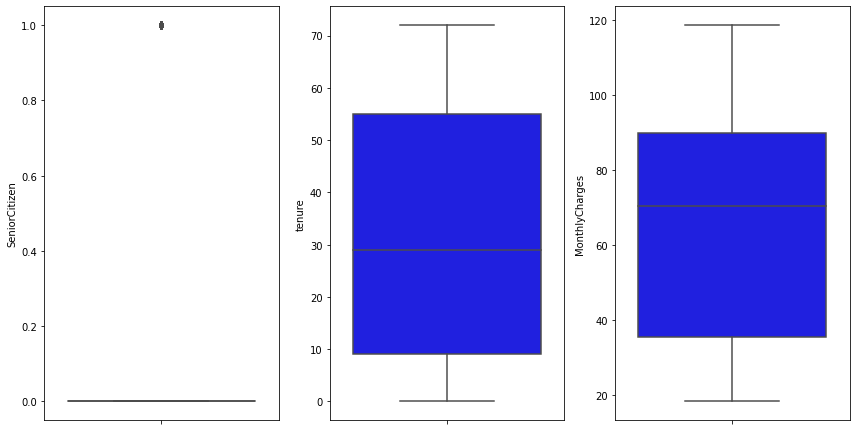

In [16]:
#ploting the box plot for the numerical data set 
plt.figure(figsize=(12,12))
for i,col in enumerate(num_col):
  plt.subplot(2,3,i+1)
  sn.boxplot(y=col,color='b',data=df)
  plt.tight_layout()

We can see that there are no outliers

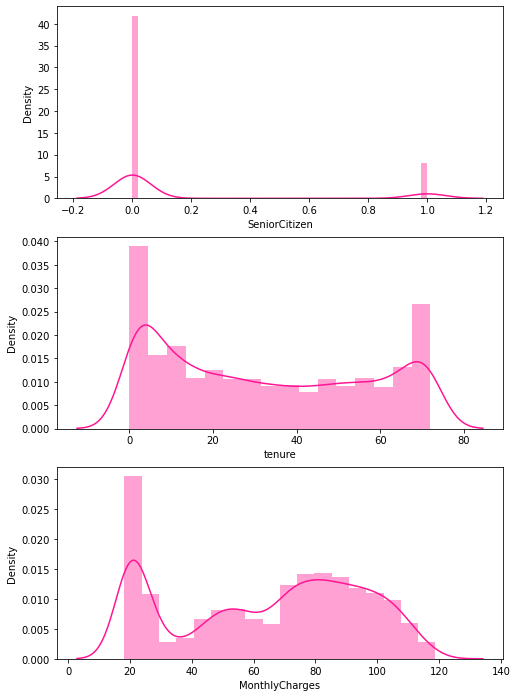

In [17]:
#ploting the dist plot for the numerical data set 
plt.figure(figsize=(8,12))
for i,col in enumerate(num_col):
  plt.subplot(3,1,i+1)
  sn.distplot(df[col],color='deeppink')

There is some skewness in our data set.

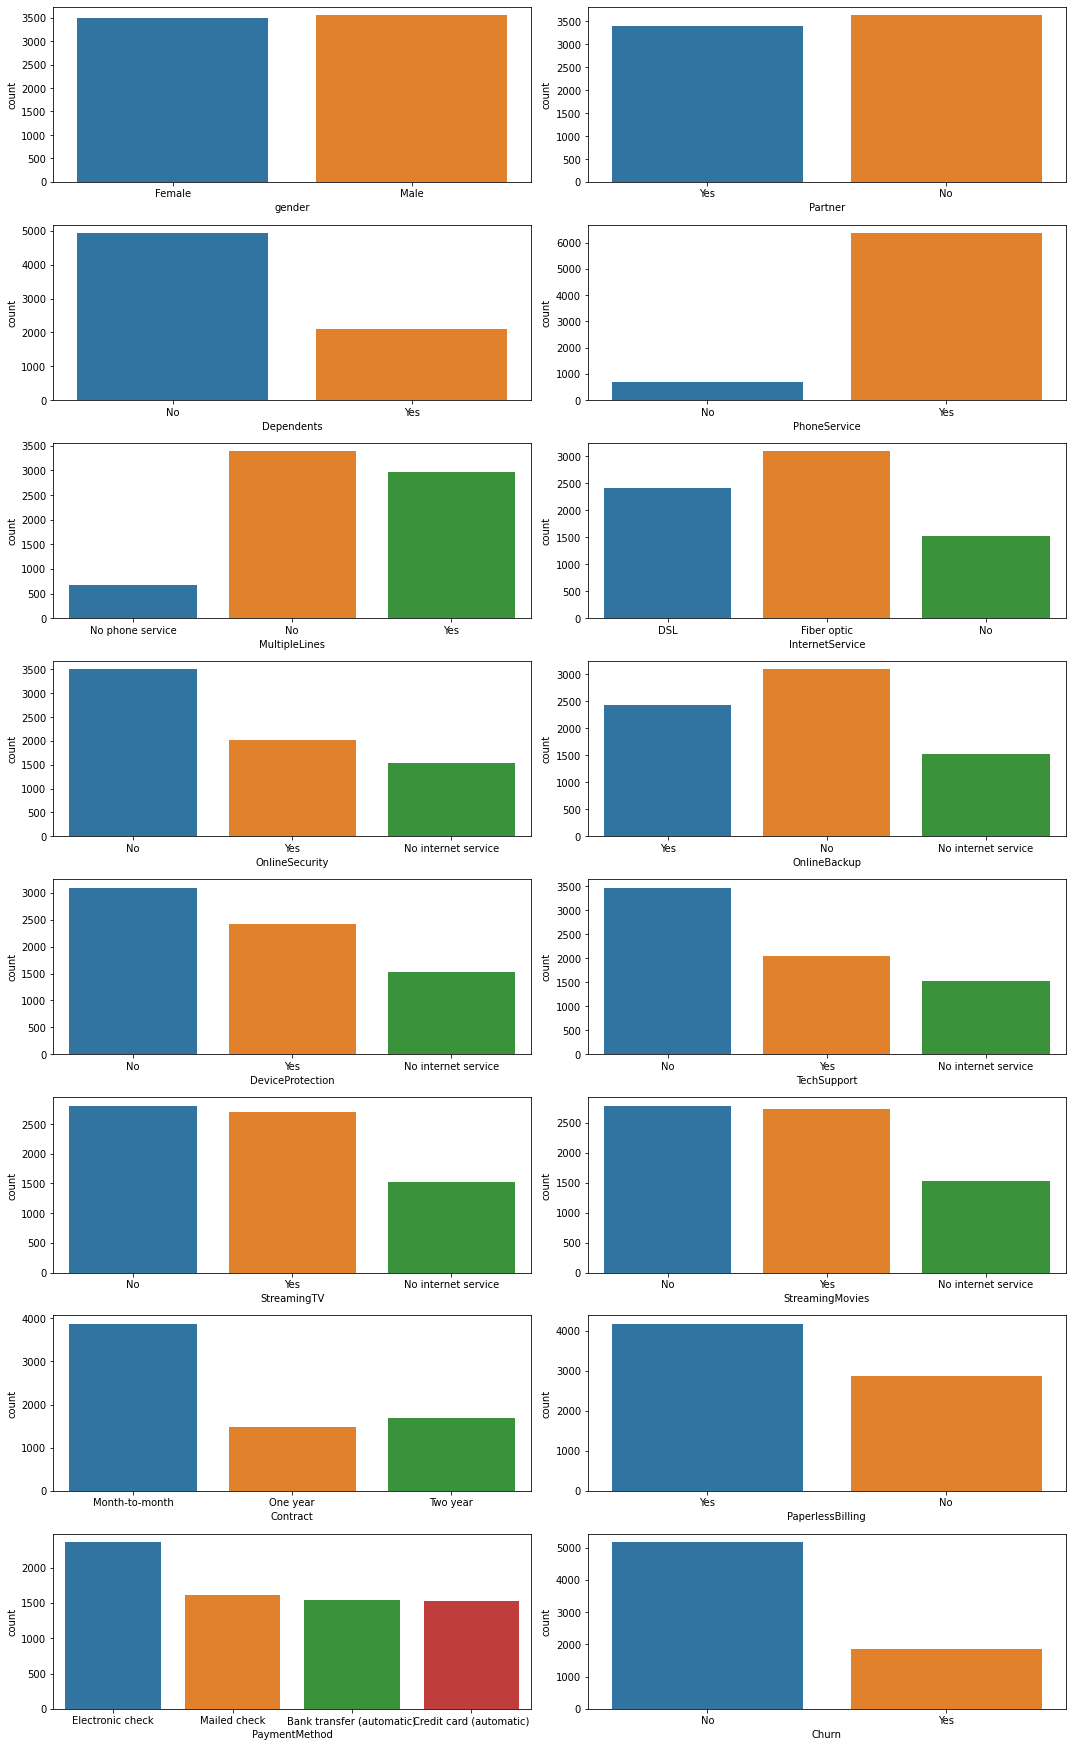

In [18]:
#plotting count plot for catogorical variable
colm=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
plt.figure(figsize=(15,30))
for i,col in enumerate(colm):
  plt.subplot(10,2,i+1)
  sn.countplot(col,data=df)
  plt.tight_layout()

We can see that there is class imbalance in our data set and in most no the columns 'No' input has got some suffix and we need to get rid of this. 

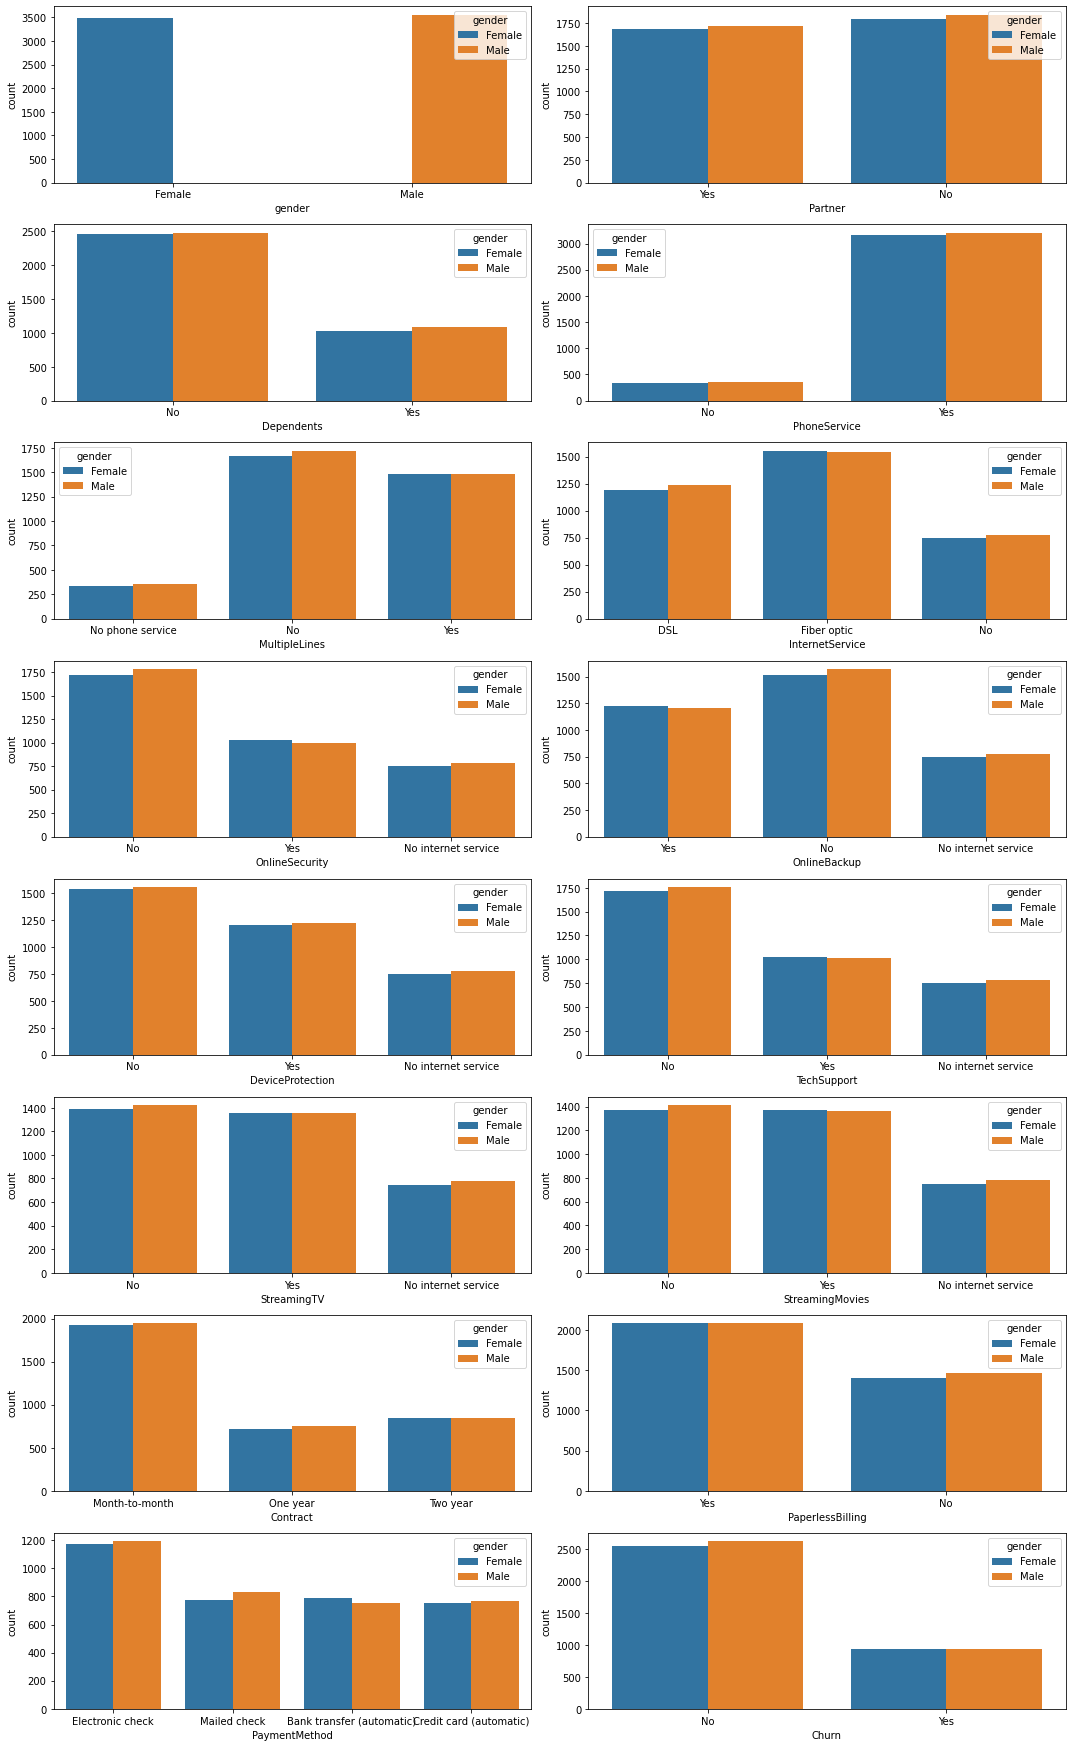

In [19]:
#plotting count plot for catogorical variable to see variation with gender
colm=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
plt.figure(figsize=(15,30))
for i,col in enumerate(colm):
  plt.subplot(10,2,i+1)
  sn.countplot(col,hue='gender',data=df)
  plt.tight_layout()

We can see that both gender share equal oppurtunity in all senario

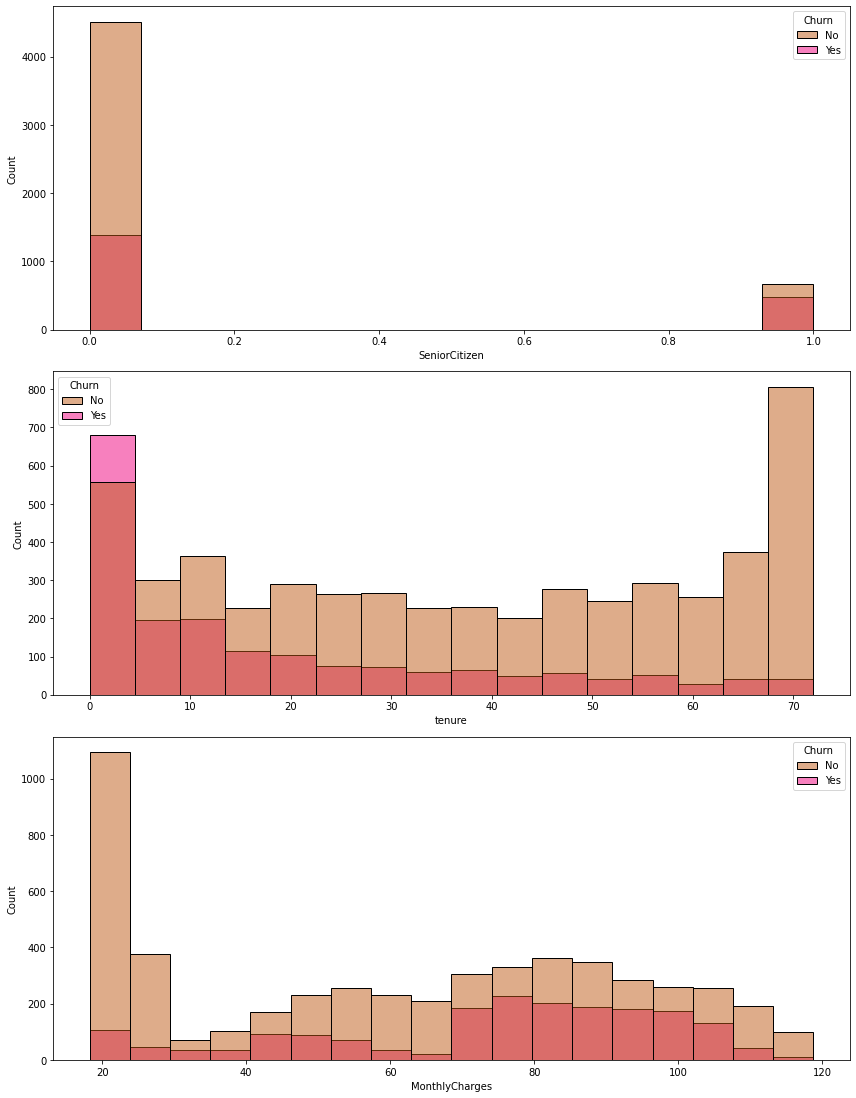

In [20]:
#plotting hist plot for catogorical column
Num_column=['SeniorCitizen', 'tenure', 'MonthlyCharges']
sn.set_palette('Accent_r')
plt.figure(figsize=(12,20))
for i,col in enumerate(Num_column):
  plt.subplot(4,1,i+1)
  sn.histplot(x=col,hue='Churn',data=df)
  plt.tight_layout()

We can see that people with more the 30 tenure are unlikely to Churn.

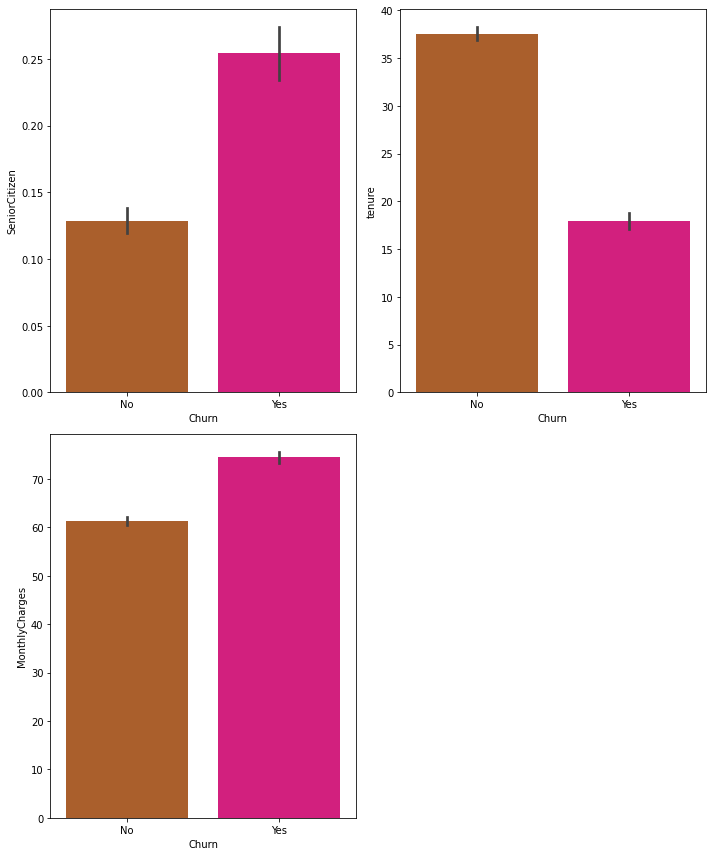

In [21]:
#plotting the bar plot catergorical column with churn
colm=['SeniorCitizen', 'tenure', 'MonthlyCharges']
plt.figure(figsize=(10,12))
for i,col in enumerate(colm):
  plt.subplot(2,2,i+1)
  sn.barplot(y=col,x='Churn',data=df)
  plt.tight_layout()

We can see that if monthly charges is high then its likely to churn.

In [22]:
colum=['SeniorCitizen', 'tenure', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

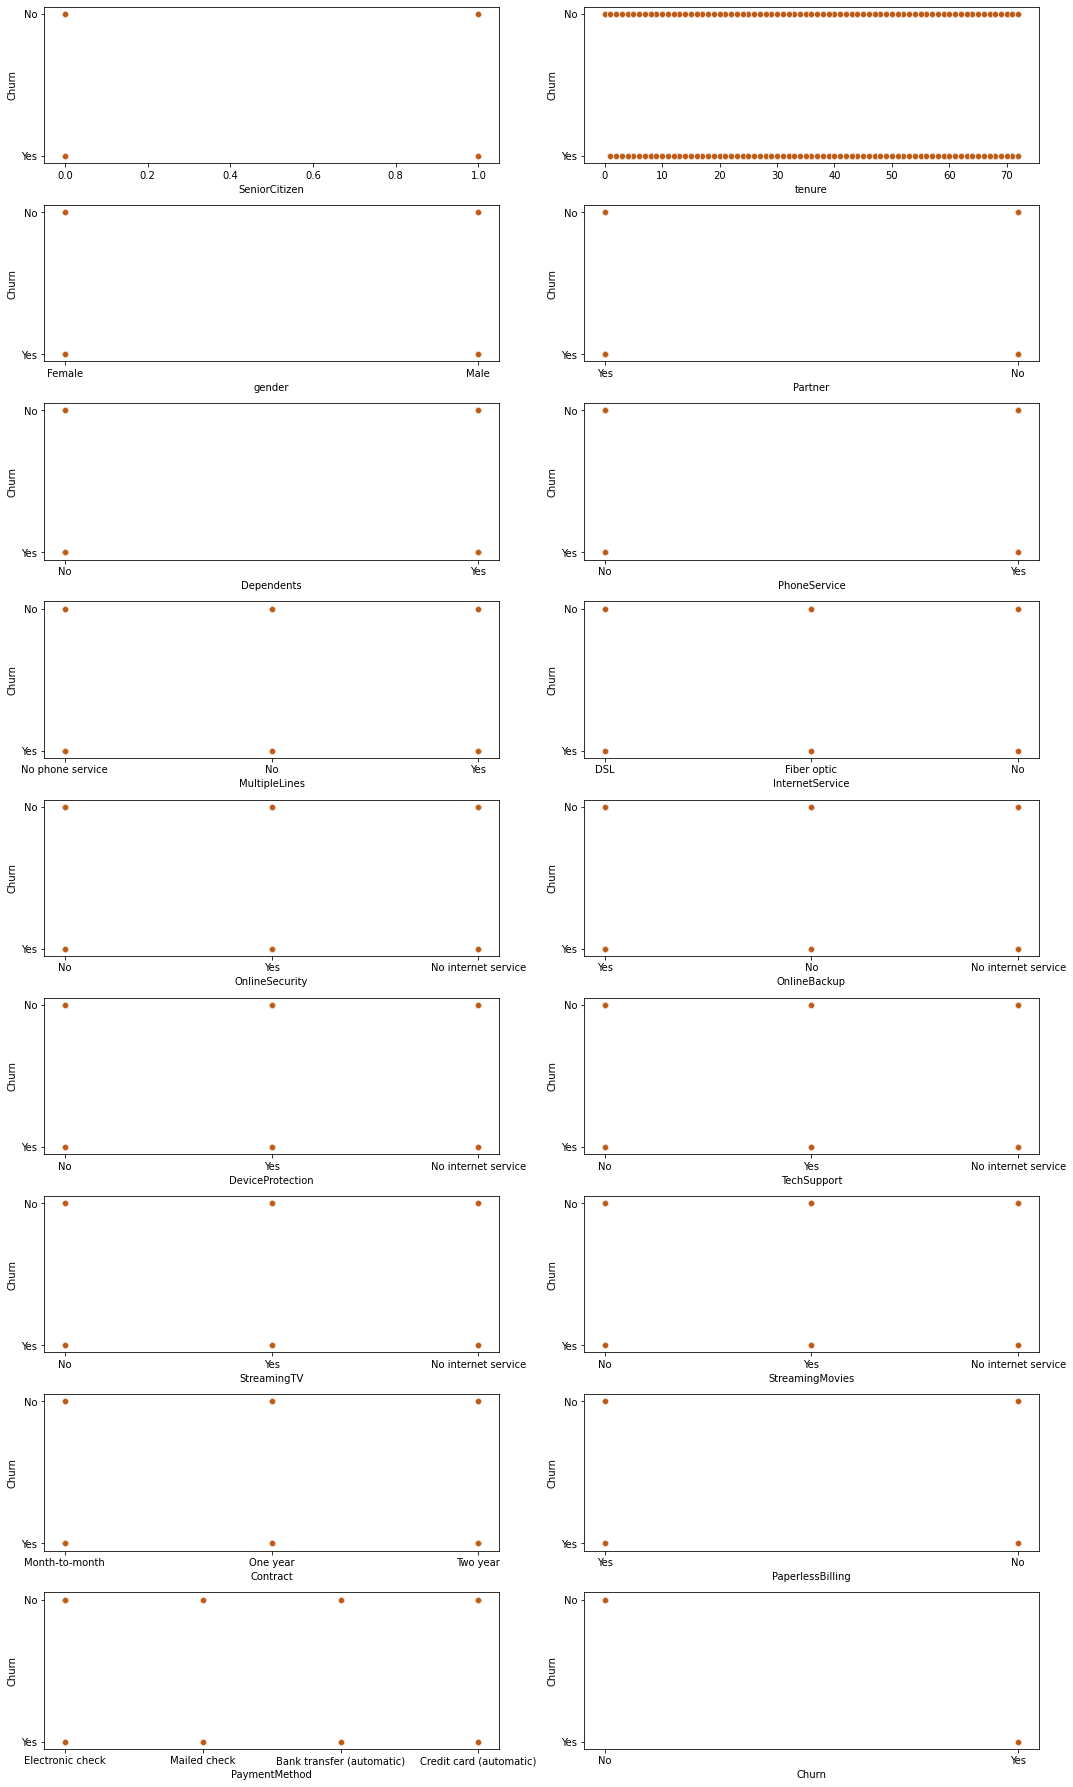

In [23]:
#plotting the scatter plot with Dependent variable and categorical value 
plt.figure(figsize=(15,30))
for i,col in enumerate(colum):
  plt.subplot(11,2,i+1)
  sn.scatterplot(x=col,y='Churn',data=df)
  plt.tight_layout()

We can see that dot is present in all cross class 

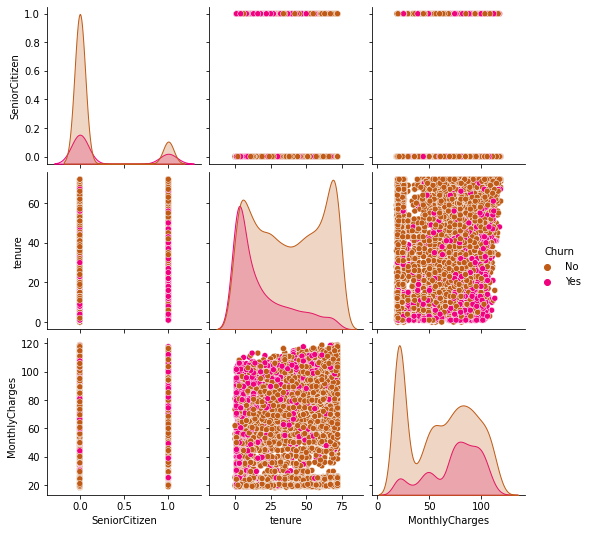

In [24]:
#ploting pair plot for our data set
sn.pairplot(df,hue='Churn')

The cluster of churn-yes and churn-no is overlapping

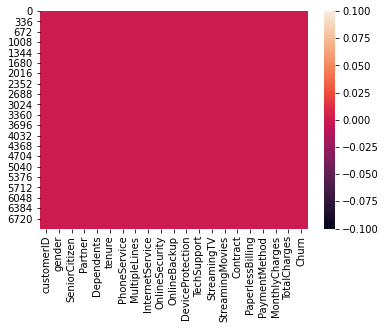

In [25]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull())

There is no null value

In [26]:
#seeing correlation of each parameter with label column
df_Cor=df.corr()
df_Cor

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


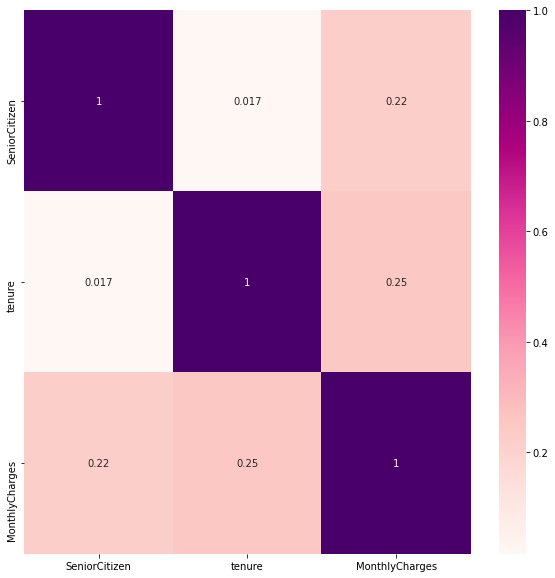

In [27]:
#ploting heat map for correlation matrix
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True,cmap='RdPu')

We can see that there is no such strong corellation with independent varialbe

## Data Cleaning

In [28]:
#droping the rows with no-entry in Total charges column 
df=df[df['TotalCharges'] != ' ']

In [29]:
#droping the custoner ID
df.drop(['customerID'],axis=1,inplace=True)

We can see that custoner ID is unique foe every one and we cannot get much insight with that

In [30]:
#coverting total charges into float type
df['TotalCharges']=df['TotalCharges'].astype(float)

In [31]:
#Removing the suffix present with Entry No
culm=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in culm:
  df[i].replace('No internet service','No',inplace=True)
df['MultipleLines'].replace('No phone service','No',inplace=True)

In [32]:
#coverting the Dependent variable to numerical type
culm=['Partner','Dependents','PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in culm:
  df[i]=df[i].apply(lambda x:1 if x=='Yes' else 0)

We have placed churn  Yes with 1 and No with 0

In [33]:
#Encoding our data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [34]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

I have applied label encoder on gender and paymentmethod

In [35]:
a=['No','DSL','Fiber optic']
b=['Month-to-month','One year','Two year']

In [36]:
from sklearn.preprocessing import OrdinalEncoder
df['InternetService']=OrdinalEncoder(categories=[a]).fit_transform(df['InternetService'].values.reshape(-1,1))
df['Contract']=OrdinalEncoder(categories=[b]).fit_transform(df['Contract'].values.reshape(-1,1))

I have applied ordinal encoding on contract and internet service

In [38]:
#Creating the dependent and independent variable 
x=df.drop('Churn',axis=1)
y=df['Churn']

In [39]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [40]:
#applying standard scaling method on X variable 
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [41]:
#applying over sampling on X and Y parameters 
from imblearn.over_sampling import SMOTE
ovs=SMOTE()
x_over,y_over=ovs.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape,'\n')

(10326, 19)
(10326,) 



# Model building

In [42]:
#import library for model building
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [43]:
#selecting best random state
from sklearn.tree import DecisionTreeClassifier
maxA=0
maxR=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxA:
        maxA=acc
        maxR=i
print('Best accuracy is ',maxA,' on random state ',maxR)

Best accuracy is  0.8018076178179471  on random state  6


In [44]:
#building model using the Random Forest, Decision Tree classifier, SVC, Logistic Regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [45]:
#spliting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=6)

In [46]:
#Model building
model={RandomForestClassifier():"RandomForestClassifier", DecisionTreeClassifier():'DecisionTreeClassifier', SVC():'SVC', 
       LogisticRegression():'LogisticRegression'}
accscore=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  accs=accuracy_score(y_test,pred)
  print("Accuracy Score is ",accs,'\n')
  accscore.append(accs)
  cm=confusion_matrix(y_test,pred)
  print('confusion Matrix \n',cm,'\n')
  cr=classification_report(y_test,pred)
  print('Classification Report',cr)

  c=cross_val_score(key,x_over,y_over,cv=5)
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  print('\n\n\n')

=====  RandomForestClassifier  model ===== 
Accuracy Score is  0.8624919302775984 

confusion Matrix 
 [[1322  227]
 [ 199 1350]] 

Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1549
           1       0.86      0.87      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Cross validation score is 0.8481577670528726 





=====  DecisionTreeClassifier  model ===== 
Accuracy Score is  0.8034215622982569 

confusion Matrix 
 [[1237  312]
 [ 297 1252]] 

Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1549
           1       0.80      0.81      0.80      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.8

In [47]:
#selecting the best model from the above model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['RandomForestClassifier','DecisionTreeClassifier', 'SVC','LogisticRegression']
Modelselection['Accuracy Score']=accscore
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['Accuracy Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,Accuracy Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,RandomForestClassifier,0.862492,0.848158,0.014334
1,DecisionTreeClassifier,0.803422,0.782983,0.020439
2,SVC,0.821821,0.806413,0.015407
3,LogisticRegression,0.791156,0.773969,0.017187


We have got RandomForestClassifier with 86% of accuracy and lets do hyper parameter tuning on that

In [48]:
#Hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p1={'max_features':['auto','sqrt'],'criterion': ['gini','entropy'],'max_depth':np.arange(2,20)}
p2={'oob_score':['True'],'class_weight':['balanced','balanced_subsample'],'max_leaf_nodes':np.arange(1,30,5)}
p=[p1,p2]
for i in p:
  r_f=RandomForestClassifier()
  clf=GridSearchCV(r_f,i)
  clf.fit(x_train,y_train)
  print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto'}
{'class_weight': 'balanced', 'max_leaf_nodes': 26, 'oob_score': 'True'}


In [49]:
#tuning using 1st set best parameter
model_1=RandomForestClassifier(criterion='entropy', max_depth=18, max_features='auto')
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_1,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8589412524209167 

confusion Matrix 
 [[1294  255]
 [ 182 1367]] 

Classification Report               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1549
           1       0.84      0.88      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Cross validation score is 0.8482543380782834 



In [50]:
#tuning using 2st set best parameter
model_2=RandomForestClassifier(class_weight='balanced', max_leaf_nodes=26, oob_score=True)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8253712072304713 

confusion Matrix 
 [[1219  330]
 [ 211 1338]] 

Classification Report               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1549
           1       0.80      0.86      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

Cross validation score is 0.8086422160706375 



After hyper parameter there is so such improvenment in our model so lets make our RandomForestClassifier base modle as our final model

In [54]:
#tuning using 2st set best parameter
fin=RandomForestClassifier()
fin.fit(x_train,y_train)
pred=fin.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(fin,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8663653970303422 

confusion Matrix 
 [[1329  220]
 [ 194 1355]] 

Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1549
           1       0.86      0.87      0.87      1549

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.87      3098
weighted avg       0.87      0.87      0.87      3098

Cross validation score is 0.848447714524798 



We have got our best model at **86%** accuracy with 1% Deveation

In [51]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model_1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

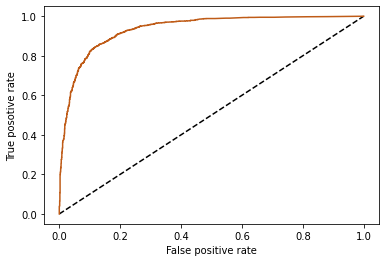

auc_score :  0.8589412524209167


In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.show()
auc_score=roc_auc_score(y_test,model_1.predict(x_test))
print('auc_score : ',auc_score)

## Saving the model

In [53]:
#saving the model
import joblib
joblib.dump(model_1,'FinalModel.pk1')

['FinalModel.pk1']